# 마케팅 전략 수립을 위한 3단계 계층적 에이전트 팀

## 전체 아키텍처

```
Super-Graph (최상위 감독자)
    ├── Intent Classifier (의도 분류)
    ├── Team 1: 시장 분석 팀 (Market Analysis Team)
    ├── Team 2: 전략 수립 팀 (Strategy Planning Team)
    ├── Team 3: 실행 계획 생성 팀 (Action Plan Generation Team)
    └── Team 4: 전술 실행 팀 (Tactical Execution Team)
```

## 정리 및 다음 단계

### 현재 구현된 기능
1. ✅ 의도 분류 에이전트
2. ✅ 4개 팀 구조 (시장 분석, 전략 수립, 실행 계획, 전술 실행)
3. ✅ 동적 라우팅 시스템
4. ✅ 계층적 감독자 구조

### 추가 구현 필요 사항
1. 🔲 실제 데이터 연동 (Dataset 1, 2, 3)
2. 🔲 날씨 API 통합 (Team 4)
3. 🔲 웹 스크래핑 도구 (지역 행사 정보)
4. 🔲 이미지 검색 도구 (콘텐츠 무드보드)
5. 🔲 더 정교한 분석 로직 (고객적합도점수, 리스크점수 등)

### 개선 방안
1. 각 팀의 상태에 더 구체적인 필드 추가
2. 팀 간 정보 전달 최적화
3. 에러 핸들링 강화
4. 실행 시간 최적화
5. 결과물 품질 검증 로직 추가"

마케팅 전략 수립 에이전트 팀 - 그래프 구조

[Team 1: 시장 분석 팀 Market Analysis Team]
--------------------------------------------------------------------------------


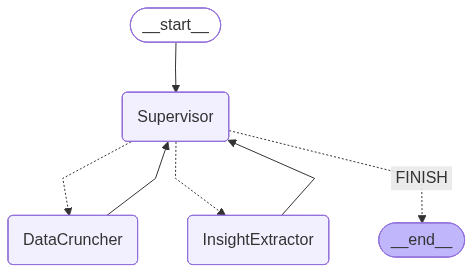


[Team 2: 전략 수립 팀 Strategy Planning Team]
--------------------------------------------------------------------------------


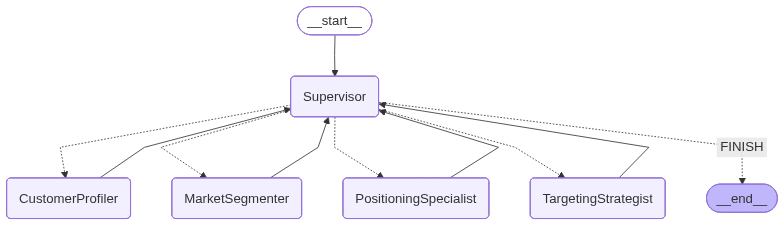


[Team 3: 실행 계획 생성 팀 Action Plan Generation Team]
--------------------------------------------------------------------------------


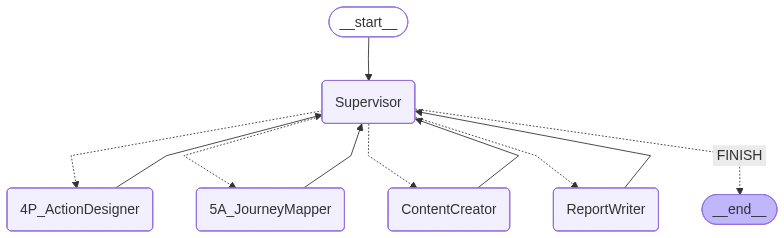


[Team 4: 단기 전술 팀 Tactical Execution Team]
--------------------------------------------------------------------------------


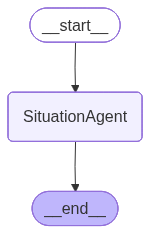


[Super-Graph: Complete Structure]
--------------------------------------------------------------------------------


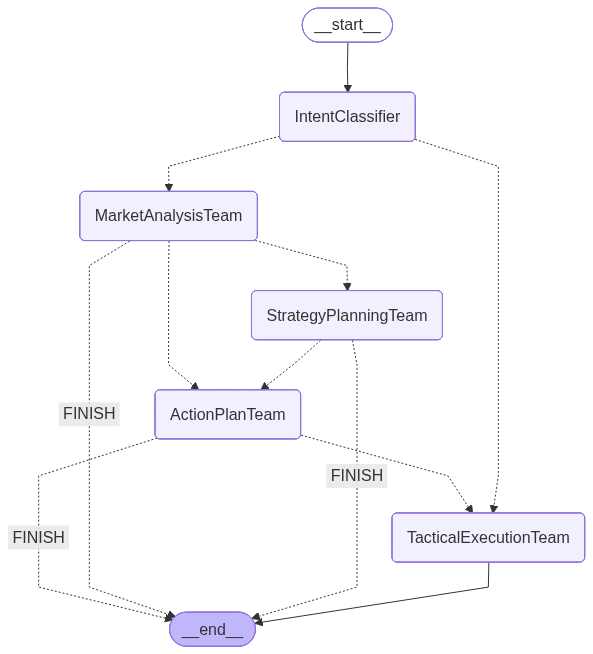


그래프 구조 확인 완료

[그래프 정보]
- Team 1 노드 수: 5
- Team 2 노드 수: 7
- Team 3 노드 수: 7
- Team 4 노드 수: 3
- Super-Graph 노드 수: 7


In [1]:
"""
마케팅 전략 수립 에이전트 팀 - 그래프 구조 확인용 코드
"""

from typing import TypedDict, List, Annotated, Literal
import operator
from langchain_core.messages import BaseMessage
from langgraph.graph import StateGraph, END
from pydantic import BaseModel


# ============================================================================
# 상태 정의
# ============================================================================

class SuperGraphState(TypedDict):
    """최상위 그래프 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    intent_tags: List[str]
    next: str


class MarketAnalysisState(TypedDict):
    """시장 분석 팀 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    analysis_report: str
    chart_data: str


class StrategyPlanningState(TypedDict):
    """전략 수립 팀 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    stp_strategy_document: str


class ActionPlanState(TypedDict):
    """실행 계획 생성 팀 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    current_files: str


class TacticalExecutionState(TypedDict):
    """전술 실행 팀 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    next: str


# ============================================================================
# 더미 노드 함수들 (구조 확인용)
# ============================================================================

def intent_classifier_node(state):
    """의도 분류 노드"""
    return state


def data_cruncher_node(state):
    """데이터 분석가 노드"""
    return state


def insight_extractor_node(state):
    """인사이트 추출가 노드"""
    return state


def market_analysis_supervisor(state):
    """시장 분석 팀 감독자"""
    return {"next": "FINISH"}


def market_segmenter_node(state):
    """시장 환경 분석가 노드"""
    return state


def customer_profiler_node(state):
    """고객 프로파일러 노드"""
    return state


def targeting_strategist_node(state):
    """타겟팅 전략가 노드"""
    return state


def positioning_specialist_node(state):
    """포지셔닝 전문가 노드"""
    return state


def strategy_planning_supervisor(state):
    """전략 수립 팀 감독자"""
    return {"next": "FINISH"}


def four_p_designer_node(state):
    """4P 액션 설계자 노드"""
    return state


def five_a_mapper_node(state):
    """5A 고객 여정 설계자 노드"""
    return state


def content_creator_node(state):
    """콘텐츠 크리에이터 노드"""
    return state


def report_writer_node(state):
    """보고서 작성자 노드"""
    return state


def action_plan_supervisor(state):
    """실행 계획 팀 감독자"""
    return {"next": "FINISH"}


def situation_agent_node(state):
    """상황 분석가 노드"""
    return state


# ============================================================================
# 라우팅 함수들
# ============================================================================

def get_next_node(state):
    """다음 노드 결정"""
    return state.get("next", "FINISH")


def route_based_on_intent(state):
    """의도 기반 초기 라우팅"""
    intent_tags = state.get("intent_tags", [])
    
    if "상황_전술_제안" in intent_tags and len(intent_tags) == 1:
        return "TacticalExecutionTeam"
    
    return "MarketAnalysisTeam"


def route_after_team_completion(state):
    """팀 완료 후 라우팅"""
    # 실제로는 메시지 분석 필요, 여기서는 간단히 처리
    return "FINISH"


# ============================================================================
# Team 1: 시장 분석 팀 그래프
# ============================================================================

market_analysis_graph = StateGraph(MarketAnalysisState)

# 노드 추가
market_analysis_graph.add_node("DataCruncher", data_cruncher_node)
market_analysis_graph.add_node("InsightExtractor", insight_extractor_node)
market_analysis_graph.add_node("Supervisor", market_analysis_supervisor)

# 엣지 추가
market_analysis_graph.add_edge("DataCruncher", "Supervisor")
market_analysis_graph.add_edge("InsightExtractor", "Supervisor")

# 조건부 엣지e
market_analysis_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "DataCruncher": "DataCruncher",
        "InsightExtractor": "InsightExtractor",
        "FINISH": END
    }
)

market_analysis_graph.set_entry_point("Supervisor")
market_analysis_team = market_analysis_graph.compile()


# ============================================================================
# Team 2: 전략 수립 팀 그래프
# ============================================================================

strategy_planning_graph = StateGraph(StrategyPlanningState)

# 노드 추가
strategy_planning_graph.add_node("MarketSegmenter", market_segmenter_node)
strategy_planning_graph.add_node("CustomerProfiler", customer_profiler_node)
strategy_planning_graph.add_node("TargetingStrategist", targeting_strategist_node)
strategy_planning_graph.add_node("PositioningSpecialist", positioning_specialist_node)
strategy_planning_graph.add_node("Supervisor", strategy_planning_supervisor)

# 엣지 추가
strategy_planning_graph.add_edge("MarketSegmenter", "Supervisor")
strategy_planning_graph.add_edge("CustomerProfiler", "Supervisor")
strategy_planning_graph.add_edge("TargetingStrategist", "Supervisor")
strategy_planning_graph.add_edge("PositioningSpecialist", "Supervisor")

# 조건부 엣지
strategy_planning_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "MarketSegmenter": "MarketSegmenter",
        "CustomerProfiler": "CustomerProfiler",
        "TargetingStrategist": "TargetingStrategist",
        "PositioningSpecialist": "PositioningSpecialist",
        "FINISH": END
    }
)

strategy_planning_graph.set_entry_point("Supervisor")
strategy_planning_team = strategy_planning_graph.compile()


# ============================================================================
# Team 3: 실행 계획 생성 팀 그래프
# ============================================================================

action_plan_graph = StateGraph(ActionPlanState)

# 노드 추가
action_plan_graph.add_node("4P_ActionDesigner", four_p_designer_node)
action_plan_graph.add_node("5A_JourneyMapper", five_a_mapper_node)
action_plan_graph.add_node("ContentCreator", content_creator_node)
action_plan_graph.add_node("ReportWriter", report_writer_node)
action_plan_graph.add_node("Supervisor", action_plan_supervisor)

# 엣지 추가
action_plan_graph.add_edge("4P_ActionDesigner", "Supervisor")
action_plan_graph.add_edge("5A_JourneyMapper", "Supervisor")
action_plan_graph.add_edge("ContentCreator", "Supervisor")
action_plan_graph.add_edge("ReportWriter", "Supervisor")

# 조건부 엣지
action_plan_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "4P_ActionDesigner": "4P_ActionDesigner",
        "5A_JourneyMapper": "5A_JourneyMapper",
        "ContentCreator": "ContentCreator",
        "ReportWriter": "ReportWriter",
        "FINISH": END
    }
)

action_plan_graph.set_entry_point("Supervisor")
action_plan_team = action_plan_graph.compile()


# ============================================================================
# Team 4: 전술 실행 팀 그래프
# ============================================================================

tactical_execution_graph = StateGraph(TacticalExecutionState)

# 노드 추가
tactical_execution_graph.add_node("SituationAgent", situation_agent_node)

# 엣지 추가
tactical_execution_graph.set_entry_point("SituationAgent")
tactical_execution_graph.add_edge("SituationAgent", END)

tactical_execution_team = tactical_execution_graph.compile()


# ============================================================================
# Super-Graph: 최상위 그래프
# ============================================================================

super_graph = StateGraph(SuperGraphState)

# 노드 추가
super_graph.add_node("IntentClassifier", intent_classifier_node)
super_graph.add_node("MarketAnalysisTeam", lambda x: x)  # 서브그래프 호출
super_graph.add_node("StrategyPlanningTeam", lambda x: x)  # 서브그래프 호출
super_graph.add_node("ActionPlanTeam", lambda x: x)  # 서브그래프 호출
super_graph.add_node("TacticalExecutionTeam", lambda x: x)  # 서브그래프 호출

# 시작점
super_graph.set_entry_point("IntentClassifier")

# 의도 분류 후 초기 라우팅
super_graph.add_conditional_edges(
    "IntentClassifier",
    route_based_on_intent,
    {
        "MarketAnalysisTeam": "MarketAnalysisTeam",
        "TacticalExecutionTeam": "TacticalExecutionTeam"
    }
)

# MarketAnalysisTeam 완료 후
super_graph.add_conditional_edges(
    "MarketAnalysisTeam",
    lambda x: "StrategyPlanningTeam",  # 간단히 처리
    {
        "StrategyPlanningTeam": "StrategyPlanningTeam",
        "ActionPlanTeam": "ActionPlanTeam",
        "FINISH": END
    }
)

# StrategyPlanningTeam 완료 후
super_graph.add_conditional_edges(
    "StrategyPlanningTeam",
    lambda x: "ActionPlanTeam",
    {
        "ActionPlanTeam": "ActionPlanTeam",
        "FINISH": END
    }
)

# ActionPlanTeam 완료 후
super_graph.add_conditional_edges(
    "ActionPlanTeam",
    lambda x: "FINISH",
    {
        "TacticalExecutionTeam": "TacticalExecutionTeam",
        "FINISH": END
    }
)

# TacticalExecutionTeam 완료
super_graph.add_edge("TacticalExecutionTeam", END)

# 최종 컴파일
marketing_super_graph = super_graph.compile()


# ============================================================================
# 그래프 시각화
# ============================================================================

if __name__ == "__main__":
    print("=" * 80)
    print("마케팅 전략 수립 에이전트 팀 - 그래프 구조")
    print("=" * 80)
    
    print("\n[Team 1: 시장 분석 팀 Market Analysis Team]")
    print("-" * 80)
    try:
        from IPython.display import Image, display
        display(Image(market_analysis_team.get_graph().draw_mermaid_png()))
    except:
        print(market_analysis_team.get_graph().draw_ascii())
    
    print("\n[Team 2: 전략 수립 팀 Strategy Planning Team]")
    print("-" * 80)
    try:
        display(Image(strategy_planning_team.get_graph().draw_mermaid_png()))
    except:
        print(strategy_planning_team.get_graph().draw_ascii())
    
    print("\n[Team 3: 실행 계획 생성 팀 Action Plan Generation Team]")
    print("-" * 80)
    try:
        display(Image(action_plan_team.get_graph().draw_mermaid_png()))
    except:
        print(action_plan_team.get_graph().draw_ascii())
    
    print("\n[Team 4: 단기 전술 팀 Tactical Execution Team]")
    print("-" * 80)
    try:
        display(Image(tactical_execution_team.get_graph().draw_mermaid_png()))
    except:
        print(tactical_execution_team.get_graph().draw_ascii())
    
    print("\n[Super-Graph: Complete Structure]")
    print("-" * 80)
    try:
        display(Image(marketing_super_graph.get_graph().draw_mermaid_png()))
    except:
        print(marketing_super_graph.get_graph().draw_ascii())
    
    print("\n" + "=" * 80)
    print("그래프 구조 확인 완료")
    print("=" * 80)
    
    # 각 그래프 정보 출력
    print("\n[그래프 정보]")
    print(f"- Team 1 노드 수: {len(market_analysis_team.get_graph().nodes)}")
    print(f"- Team 2 노드 수: {len(strategy_planning_team.get_graph().nodes)}")
    print(f"- Team 3 노드 수: {len(action_plan_team.get_graph().nodes)}")
    print(f"- Team 4 노드 수: {len(tactical_execution_team.get_graph().nodes)}")
    print(f"- Super-Graph 노드 수: {len(marketing_super_graph.get_graph().nodes)}")

## 1. 환경 설정

In [2]:
# 필요한 라이브러리 설치
# !pip install langchain langchain-openai langchain-community langgraph langchain-experimental python-dotenv

In [ ]:
from dotenv import load_dotenv
import os

# API 키 로드
load_dotenv()

# 모델 이름 설정
MODEL_NAME = "gemini-2.5-flash" 

## 2. 공통 유틸리티 및 도구 정의

In [12]:
# !pip install langchain-experimental

In [13]:
import operator
from typing import List, TypedDict, Annotated, Literal, Optional, Dict
from pathlib import Path

from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_experimental.tools import PythonREPLTool
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from pydantic import BaseModel

# 작업 디렉토리 설정
WORKING_DIRECTORY = Path("./marketing_output")
WORKING_DIRECTORY.mkdir(exist_ok=True)

In [14]:
# Agent Factory 클래스
class AgentFactory:
    def __init__(self, model_name):
        self.llm = ChatGoogleGenerativeAI(model=model_name, temperature=0)

    def create_agent_node(self, agent, name: str):
        def agent_node(state):
            result = agent.invoke(state)
            return {
                "messages": [
                    HumanMessage(content=result["messages"][-1].content, name=name)
                ]
            }
        return agent_node

# Factory 인스턴스 생성
agent_factory = AgentFactory(MODEL_NAME)
llm = ChatGoogleGenerativeAI(model=MODEL_NAME, temperature=0)

E0000 00:00:1760558936.811509    1368 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760558936.818957    1368 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [15]:
# # 팀 감독자 생성 함수 - 
# def create_team_supervisor(model_name, system_prompt, members):
#     options_for_next = ["FINISH"] + members

#     class RouteResponse(BaseModel):
#         next: Literal[*options_for_next]

#     prompt = ChatPromptTemplate.from_messages(
#         [
#             ("system", system_prompt),
#             MessagesPlaceholder(variable_name="messages"),
#             (
#                 "system",
#                 "대화 내용을 바탕으로 다음에 누가 작업해야 할까요? "
#                 "아니면 작업을 완료(FINISH)해야 할까요? 다음 중 하나를 선택하세요: {options}",
#             ),
#         ]
#     ).partial(options=str(options_for_next))

#     llm = ChatGoogleGenerativeAI(model=model_name, temperature=0)
#     supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
#     return supervisor_chain

# # 라우팅 함수
# def get_next_node(x):
#     return x["next"]

In [16]:
from typing import Literal
from pydantic import BaseModel, Field, validator
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_google_genai import ChatGoogleGenerativeAI
from enum import Enum


# 방법 1: Enum 사용 (권장) *Gemini는 동적 Literal[*options_for_next] 문법을 지원하지 않음


def create_team_supervisor(model_name, system_prompt, members):
    """팀 감독자 생성 함수 - Gemini 호환 버전"""
    
    options_for_next = ["FINISH"] + members
    
    # Enum 동적 생성
    RouteEnum = Enum('RouteEnum', {option: option for option in options_for_next})
    
    class RouteResponse(BaseModel):
        next: str = Field(description=f"다음 작업자 선택: {', '.join(options_for_next)}")
        
        @validator('next')
        def validate_next(cls, v):
            if v not in options_for_next:
                raise ValueError(f"next는 다음 중 하나여야 합니다: {options_for_next}")
            return v
    
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system_prompt),
            MessagesPlaceholder(variable_name="messages"),
            (
                "system",
                "대화 내용을 바탕으로 다음에 누가 작업해야 할까요? "
                "아니면 작업을 완료(FINISH)해야 할까요? 다음 중 하나를 선택하세요: {options}",
            ),
        ]
    ).partial(options=str(options_for_next))
    
    llm = ChatGoogleGenerativeAI(model=model_name, temperature=0)
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    
    return supervisor_chain





# ============================================================================
# 테스트 코드
# ============================================================================

if __name__ == "__main__":
    # 테스트
    members = ["DataCruncher", "InsightExtractor"]
    
    supervisor = create_team_supervisor(
        model_name="gemini-2.5-pro",
        system_prompt="당신은 팀 감독자입니다.",
        members=members
    )
    
    print("✅ 팀 감독자 생성 성공!")
    print(f"가능한 옵션: {['FINISH'] + members}")

✅ 팀 감독자 생성 성공!
가능한 옵션: ['FINISH', 'DataCruncher', 'InsightExtractor']


/tmp/ipykernel_1368/2297820700.py:22: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('next')
E0000 00:00:1760558938.704521    1368 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


## 3. 도구(Tools) 정의

In [17]:
# Python REPL 도구
python_repl_tool = PythonREPLTool()

# 파일 작성 도구
@tool
def write_document(
    content: Annotated[str, "문서에 작성할 텍스트 내용"],
    file_name: Annotated[str, "문서를 저장할 파일 경로"],
) -> Annotated[str, "저장된 문서 파일 경로"]:
    """텍스트 문서를 생성하고 저장합니다."""
    with (WORKING_DIRECTORY / file_name).open("w", encoding="utf-8") as file:
        file.write(content)
    return f"문서가 {file_name}에 저장되었습니다"

# 문서 읽기 도구
@tool
def read_document(
    file_name: Annotated[str, "읽을 문서의 파일 경로"],
    start: Annotated[Optional[int], "시작 줄 번호. 기본값은 0"] = None,
    end: Annotated[Optional[int], "종료 줄 번호. 기본값은 None"] = None,
) -> str:
    """지정된 문서를 읽습니다."""
    with (WORKING_DIRECTORY / file_name).open("r", encoding="utf-8") as file:
        lines = file.readlines()
    if start is None:
        start = 0
    return "".join(lines[start:end])

# 아웃라인 생성 도구
@tool
def create_outline(
    points: Annotated[List[str], "주요 포인트 또는 섹션 목록"],
    file_name: Annotated[str, "아웃라인을 저장할 파일 경로"],
) -> Annotated[str, "저장된 아웃라인 파일 경로"]:
    """아웃라인을 생성하고 저장합니다."""
    with (WORKING_DIRECTORY / file_name).open("w", encoding="utf-8") as file:
        for i, point in enumerate(points):
            file.write(f"{i + 1}. {point}\n")
    return f"아웃라인이 {file_name}에 저장되었습니다"

# 문서 편집 도구
@tool
def edit_document(
    file_name: Annotated[str, "편집할 문서의 파일 경로"],
    inserts: Annotated[
        Dict[int, str],
        "키는 줄 번호(1부터 시작), 값은 해당 줄에 삽입할 텍스트",
    ],
) -> Annotated[str, "편집된 문서의 파일 경로"]:
    """특정 줄 번호에 텍스트를 삽입하여 문서를 편집합니다."""
    with (WORKING_DIRECTORY / file_name).open("r", encoding="utf-8") as file:
        lines = file.readlines()

    sorted_inserts = sorted(inserts.items())

    for line_number, text in sorted_inserts:
        if 1 <= line_number <= len(lines) + 1:
            lines.insert(line_number - 1, text + "\n")
        else:
            return f"오류: 줄 번호 {line_number}가 범위를 벗어났습니다."

    with (WORKING_DIRECTORY / file_name).open("w", encoding="utf-8") as file:
        file.writelines(lines)

    return f"문서가 편집되어 {file_name}에 저장되었습니다"

## 4. 의도 분류 에이전트 (Intent Classifier Agent)

In [21]:
# 의도 분류를 위한 상태 정의
class IntentState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    intent_tags: List[str]  # 분류된 의도 태그

# 의도 분류 응답 모델
class IntentClassification(BaseModel):
    intent_tags: List[Literal["종합_전략_수립", "상황_전술_제안", "콘텐츠_생성_가이드"]]
    reasoning: str

# 의도 분류 에이전트
def create_intent_classifier():
    prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 사용자의 마케팅 관련 질문을 분석하여 적절한 작업 유형을 분류하는 전문가입니다.

작업 유형:
1. [종합_전략_수립]: 문제 진단, 근본 원인 분석, 장기적 전략 수립이 필요한 포괄적인 질문
   예: "재방문률을 높일 수 있는 마케팅 아이디어와 근거 제시"

2. [상황_전술_제안]: 날씨, 이벤트 등 외부 요인에 기반한 단기적, 즉각적 액션이 필요한 질문
   예: "비 오는 날의 전략", "최근 행사에 어울리는 마케팅 전략"

3. [콘텐츠_생성_가이드]: 특정 채널(SNS, 블로그 등)의 콘텐츠 제작에 대한 구체적인 가이드가 필요한 질문
   예: "인스타그램 홍보 방안 가이드"

사용자 질문을 분석하여 해당하는 모든 의도 태그를 선택하세요."""),
        MessagesPlaceholder(variable_name="messages"),
    ])
    
    chain = prompt | llm.with_structured_output(IntentClassification)
    return chain

intent_classifier = create_intent_classifier()

# 의도 분류 노드
def intent_classification_node(state: IntentState):
    result = intent_classifier.invoke({"messages": state["messages"]})
    return {
        "intent_tags": result.intent_tags,
        "messages": [HumanMessage(content=f"의도 분류 완료: {', '.join(result.intent_tags)}\n이유: {result.reasoning}")]
    }

In [23]:
"""
Intent Classifier 테스트 코드

목적: 사용자 질문을 3가지 의도로 정확히 분류하는지 테스트
- [종합_전략_수립]: 문제 진단 + 근본 원인 분석 + 장기 전략
- [상황_전술_제안]: 날씨/이벤트 기반 단기 액션
- [콘텐츠_생성_가이드]: SNS/블로그 콘텐츠 제작 가이드
"""

# 테스트 케이스 정의

TEST_CASES = [
    # 기획안의 사전질문
    {
        "question": "카페 업종 가맹점입니다. 주요 방문 고객 특성에 따른 마케팅 채널 추천 및 홍보안이 필요합니다.",
        "expected": ["종합_전략_수립"],
        "description": "고객 분석 + 채널 선정 + 홍보안"
    },
    {
        "question": "재방문률이 30% 이하입니다. 매장에서 재방문률을 높일 수 있는 마케팅 아이디어와 근거를 제시해주세요.",
        "expected": ["종합_전략_수립"],
        "description": "문제 진단 + 해결 전략"
    },
    {
        "question": "요식업종 가맹점입니다. 매장의 현재 가장 큰 문제점 및 이를 보완할 마케팅 아이디어와 근거를 제시해주세요.",
        "expected": ["종합_전략_수립"],
        "description": "문제점 파악 + 보완 전략"
    },
    
    # 기획안의 추가질문
    {
        "question": "카페 업종입니다. 비 오는 날의 전략과 성수 근처에서 최근 행사에 어울리는 마케팅 전략을 고안해주세요.",
        "expected": ["상황_전술_제안"],
        "description": "날씨 + 지역 행사 기반 즉각 전술"
    },
    {
        "question": "치킨 업종 가맹점입니다. 우리 치킨집 인스타그램 홍보 방안 가이드를 알려주세요.",
        "expected": ["콘텐츠_생성_가이드"],
        "description": "SNS 채널 콘텐츠 가이드"
    },
    
    # 복합 의도 테스트
    {
        "question": "비 오는 날 고객을 끌어들이기 위한 인스타그램 스토리 아이디어를 알려주세요.",
        "expected": ["상황_전술_제안", "콘텐츠_생성_가이드"],
        "description": "날씨 전술 + SNS 콘텐츠"
    },
    {
        "question": "재방문율이 낮은 문제를 해결하기 위한 블로그 콘텐츠 전략을 수립해주세요.",
        "expected": ["종합_전략_수립", "콘텐츠_생성_가이드"],
        "description": "장기 전략 + 콘텐츠 가이드"
    },
    
    # 엣지 케이스
    {
        "question": "오늘 날씨가 좋은데 뭐 하면 좋을까요?",
        "expected": ["상황_전술_제안"],
        "description": "즉각적인 날씨 대응"
    },
    {
        "question": "우리 카페 SNS는 어떻게 운영해야 하나요?",
        "expected": ["콘텐츠_생성_가이드"],
        "description": "SNS 운영 가이드"
    },
    {
        "question": "매출이 계속 떨어지고 있어요. 어떻게 해야 할까요?",
        "expected": ["종합_전략_수립"],
        "description": "근본적인 문제 해결"
    },
]



# 테스트 실행 함수


def test_intent_classifier():
    """Intent Classifier 테스트 실행"""
    
    print("=" * 80)
    print("Intent Classifier 테스트 시작")
    print("=" * 80)
    
    # Classifier 생성
    classifier = create_intent_classifier()
    
    # 결과 저장
    results = []
    correct_count = 0
    total_count = len(TEST_CASES)
    
    for i, test_case in enumerate(TEST_CASES, 1):
        print(f"\n[테스트 {i}/{total_count}]")
        print("-" * 80)
        print(f"질문: {test_case['question']}")
        print(f"설명: {test_case['description']}")
        print(f"기대값: {test_case['expected']}")
        
        # 분류 실행
        try:
            result = classifier.invoke({
                "messages": [HumanMessage(content=test_case['question'])]
            })
            
            predicted = result.intent_tags
            reasoning = result.reasoning
            
            # 정확도 체크 (순서 무관)
            is_correct = set(predicted) == set(test_case['expected'])
            
            print(f"예측값: {predicted}")
            print(f"이유: {reasoning}")
            print(f"결과: {'✅ 정답' if is_correct else '❌ 오답'}")
            
            if is_correct:
                correct_count += 1
            
            results.append({
                "question": test_case['question'],
                "expected": test_case['expected'],
                "predicted": predicted,
                "reasoning": reasoning,
                "correct": is_correct
            })
            
        except Exception as e:
            print(f"❌ 에러 발생: {str(e)}")
            results.append({
                "question": test_case['question'],
                "expected": test_case['expected'],
                "predicted": None,
                "reasoning": str(e),
                "correct": False
            })
    
    # 결과 요약
    print("\n" + "=" * 80)
    print("테스트 결과 요약")
    print("=" * 80)
    print(f"총 테스트: {total_count}개")
    print(f"정답: {correct_count}개")
    print(f"오답: {total_count - correct_count}개")
    print(f"정확도: {correct_count / total_count * 100:.1f}%")
    
    # 오답 케이스 분석
    wrong_cases = [r for r in results if not r['correct']]
    if wrong_cases:
        print("\n" + "-" * 80)
        print("오답 케이스 분석:")
        print("-" * 80)
        for case in wrong_cases:
            print(f"\n질문: {case['question']}")
            print(f"기대값: {case['expected']}")
            print(f"예측값: {case['predicted']}")
            print(f"이유: {case['reasoning']}")
    
    return results


# 개별 테스트 함수

def test_single_question(question: str):
    """개별 질문 테스트"""
    
    print("=" * 80)
    print("개별 질문 테스트")
    print("=" * 80)
    print(f"\n질문: {question}\n")
    
    classifier = create_intent_classifier()
    
    try:
        result = classifier.invoke({
            "messages": [HumanMessage(content=question)]
        })
        
        print(f"분류 결과: {result.intent_tags}")
        print(f"\n분류 이유:\n{result.reasoning}")
        
        # 라우팅 경로 설명
        print("\n" + "-" * 80)
        print("예상 작업 흐름:")
        print("-" * 80)
        
        if "종합_전략_수립" in result.intent_tags:
            print("✓ Team 1 (시장 분석) → Team 2 (전략 수립) → Team 3 (실행 계획)")
        
        if "상황_전술_제안" in result.intent_tags:
            print("✓ Team 4 (전술 실행) - 즉각 대응")
        
        if "콘텐츠_생성_가이드" in result.intent_tags:
            if "종합_전략_수립" in result.intent_tags:
                print("✓ 종합 분석 후 콘텐츠 가이드 생성")
            else:
                print("✓ Team 1 (간단 분석) → Team 3 (콘텐츠 가이드)")
        
        return result
        
    except Exception as e:
        print(f"❌ 에러 발생: {str(e)}")
        return None


# ==============
# 실행
# ==============

if __name__ == "__main__":
    # 전체 테스트 실행
    results = test_intent_classifier()
    
    # 개별 테스트 예시
    print("\n\n")
    print("=" * 80)
    print("개별 테스트 예시")
    print("=" * 80)
    
    custom_question = "우리 매장은 점심시간에 손님이 없어요. 주변 직장인을 타겟으로 한 인스타그램 마케팅 전략을 세워주세요."
    test_single_question(custom_question)

Intent Classifier 테스트 시작

[테스트 1/10]
--------------------------------------------------------------------------------
질문: 카페 업종 가맹점입니다. 주요 방문 고객 특성에 따른 마케팅 채널 추천 및 홍보안이 필요합니다.
설명: 고객 분석 + 채널 선정 + 홍보안
기대값: ['종합_전략_수립']
예측값: ['종합_전략_수립']
이유: 사용자의 질문은 카페 업종의 주요 방문 고객 특성을 분석하여 마케팅 채널을 추천하고 전반적인 홍보 방안을 수립하는 것을 요청하고 있습니다. 이는 문제 진단(고객 특성 분석), 근본 원인 분석(고객 특성에 따른 최적화), 그리고 장기적인 전략 수립(마케팅 채널 및 홍보안)이 필요한 포괄적인 질문이므로 [종합_전략_수립]에 해당합니다.
결과: ✅ 정답

[테스트 2/10]
--------------------------------------------------------------------------------
질문: 재방문률이 30% 이하입니다. 매장에서 재방문률을 높일 수 있는 마케팅 아이디어와 근거를 제시해주세요.
설명: 문제 진단 + 해결 전략
기대값: ['종합_전략_수립']
예측값: ['종합_전략_수립']
이유: 사용자의 질문은 낮은 재방문율의 원인을 진단하고, 이를 개선하기 위한 장기적인 마케팅 전략 아이디어와 그 근거를 요구하고 있습니다. 이는 포괄적인 문제 해결 및 전략 수립에 해당합니다.
결과: ✅ 정답

[테스트 3/10]
--------------------------------------------------------------------------------
질문: 요식업종 가맹점입니다. 매장의 현재 가장 큰 문제점 및 이를 보완할 마케팅 아이디어와 근거를 제시해주세요.
설명: 문제점 파악 + 보완 전략
기대값: ['종합_전략_수립']
예측값: ['종합_전략_수립']
이유: 사용자는 요식업종 가맹점의 가장 큰 문제

## 5. Team 1: 시장 분석 팀 (Market Analysis Team)

/tmp/ipykernel_1368/2297820700.py:22: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('next')
E0000 00:00:1760559408.362231    1368 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


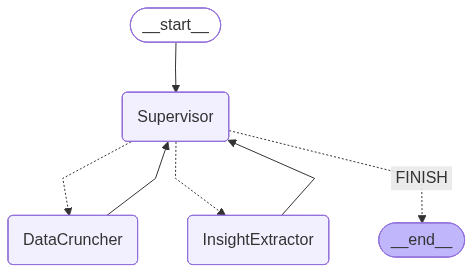

In [25]:
# 시장 분석 팀 상태
class MarketAnalysisState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    analysis_report: str  # 분석 보고서
    chart_data: str  # 차트 데이터

# 데이터 분석가 (DataCruncher) 에이전트
data_cruncher_agent = create_react_agent(
    llm,
    tools=[python_repl_tool],
    prompt="""당신은 데이터 분석 전문가입니다.
    
임무:
- 제공된 데이터를 분석하여 매출, 고객, 경쟁, 리스크 관련 지표를 심층 분석
- Python을 사용하여 통계 분석 및 시각화 수행
- 주요 지표: 매출 성장률, 상권 내 경쟁 강도, 고객적합도점수, 리스크점수 등

분석 결과는 명확한 수치와 차트로 제시하세요."""
)
data_cruncher_node = agent_factory.create_agent_node(data_cruncher_agent, "DataCruncher")

# 인사이트 추출가 (InsightExtractor) 에이전트
insight_extractor_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 비즈니스 인사이트 추출 전문가입니다.
    
임무:
- 데이터 분석 결과를 비즈니스적 의미로 해석
- 강점, 약점, 기회, 위협 요소 도출
- 핵심 고객층 특성 파악
- 명확하고 실행 가능한 인사이트 제공

예시: "20대 여성 재방문율 12%로 평균 이하 → 핵심 고객층의 충성도가 낮아 이탈 위험이 큽니다"""
)
insight_extractor_node = agent_factory.create_agent_node(insight_extractor_agent, "InsightExtractor")

# 시장 분석 팀 감독자
market_analysis_supervisor = create_team_supervisor(
    MODEL_NAME,
    """당신은 시장 분석 팀의 감독자입니다.
    
팀원: DataCruncher, InsightExtractor

작업 흐름:
1. DataCruncher: 데이터 분석 및 시각화
2. InsightExtractor: 비즈니스 인사이트 추출

분석이 충분히 깊이 있고 명확하면 FINISH를 선택하세요.""",
    ["DataCruncher", "InsightExtractor"]
)

# 시장 분석 팀 그래프
market_analysis_graph = StateGraph(MarketAnalysisState)
market_analysis_graph.add_node("DataCruncher", data_cruncher_node)
market_analysis_graph.add_node("InsightExtractor", insight_extractor_node)
market_analysis_graph.add_node("Supervisor", market_analysis_supervisor)

market_analysis_graph.add_edge("DataCruncher", "Supervisor")
market_analysis_graph.add_edge("InsightExtractor", "Supervisor")
market_analysis_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {"DataCruncher": "DataCruncher", "InsightExtractor": "InsightExtractor", "FINISH": END}
)
market_analysis_graph.set_entry_point("Supervisor")

market_analysis_app = market_analysis_graph.compile(checkpointer=MemorySaver())
market_analysis_app

## 6. Team 2: 전략 수립 팀 (Strategy Planning Team)

In [27]:
# 전략 수립 팀 상태
class StrategyPlanningState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    stp_strategy_document: str  # STP 전략 문서

# 시장 환경 분석가 (MarketSegmenter)
market_segmenter_agent = create_react_agent(
    llm,
    tools=[python_repl_tool],
    prompt="""당신은 시장 환경 분석 전문가입니다.
    
임무:
- 외부 환경(상권 건강도, 경쟁 강도, 리스크) 분석
- 내부 역량(운영 성과, 업종 내 위치) 분석
- 마케팅의 기회와 위협 요소 식별

핵심 지표: 상권 내 경쟁 강도, 평균_생존개월수, 동일업종_매출비중"""
)
market_segmenter_node = agent_factory.create_agent_node(market_segmenter_agent, "MarketSegmenter")

# 고객 프로파일러 (CustomerProfiler)
customer_profiler_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 고객 프로파일링 전문가입니다.
    
임무:
- 현재 방문 고객의 특성 분석 (성별/연령, 신규/재방문, 객단가)
- 의미 있는 고객 그룹(페르소나) 3~4개 정의
- 각 페르소나의 니즈와 행동 패턴 파악"""
)
customer_profiler_node = agent_factory.create_agent_node(customer_profiler_agent, "CustomerProfiler")

# 타겟팅 전략가 (TargetingStrategist)
targeting_strategist_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 타겟팅 전략 전문가입니다.
    
임무:
- 시장 분석과 고객 그룹을 교차 분석
- 고객적합도점수를 핵심 지표로 활용
- 최적의 타겟 전략 선택:
  * 코어 타겟 유지
  * 틈새 시장 공략
  * 신규 타겟 확장

명확한 근거와 함께 타겟팅 전략을 제시하세요."""
)
targeting_strategist_node = agent_factory.create_agent_node(targeting_strategist_agent, "TargetingStrategist")

# 포지셔닝 전문가 (PositioningSpecialist)
positioning_specialist_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 포지셔닝 전략 전문가입니다.
    
임무:
- 목표 고객에게 매력적인 USP(독특한 판매 제안) 개발
- 데이터 기반의 구체적이고 설득력 있는 포지셔닝 메시지 도출

포지셔닝 예시:
- 매출 우위: "지역에서 가장 사랑받는 맛집"
- 충성도: "단골이 선택하는 믿을 수 있는 집"
- 프리미엄: "가치 있는 소비를 위한 프리미엄 공간"""
)
positioning_specialist_node = agent_factory.create_agent_node(positioning_specialist_agent, "PositioningSpecialist")

# 전략 수립 팀 감독자
strategy_planning_supervisor = create_team_supervisor(
    MODEL_NAME,
    """당신은 전략 수립 팀의 감독자입니다.
    
팀원: MarketSegmenter, CustomerProfiler, TargetingStrategist, PositioningSpecialist

작업 흐름:
1. MarketSegmenter와 CustomerProfiler 동시 작업
2. 결과를 TargetingStrategist에게 전달
3. 최종 타겟 확정 후 PositioningSpecialist 작업
4. STP 전략 문서 완성

일관된 전략이 수립되면 FINISH를 선택하세요.""",
    ["MarketSegmenter", "CustomerProfiler", "TargetingStrategist", "PositioningSpecialist"]
)

# 전략 수립 팀 그래프
strategy_planning_graph = StateGraph(StrategyPlanningState)
strategy_planning_graph.add_node("MarketSegmenter", market_segmenter_node)
strategy_planning_graph.add_node("CustomerProfiler", customer_profiler_node)
strategy_planning_graph.add_node("TargetingStrategist", targeting_strategist_node)
strategy_planning_graph.add_node("PositioningSpecialist", positioning_specialist_node)
strategy_planning_graph.add_node("Supervisor", strategy_planning_supervisor)

strategy_planning_graph.add_edge("MarketSegmenter", "Supervisor")
strategy_planning_graph.add_edge("CustomerProfiler", "Supervisor")
strategy_planning_graph.add_edge("TargetingStrategist", "Supervisor")
strategy_planning_graph.add_edge("PositioningSpecialist", "Supervisor")
strategy_planning_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "MarketSegmenter": "MarketSegmenter",
        "CustomerProfiler": "CustomerProfiler",
        "TargetingStrategist": "TargetingStrategist",
        "PositioningSpecialist": "PositioningSpecialist",
        "FINISH": END
    }
)
strategy_planning_graph.set_entry_point("Supervisor")

strategy_planning_app = strategy_planning_graph.compile(checkpointer=MemorySaver())

/tmp/ipykernel_1368/2297820700.py:22: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('next')
E0000 00:00:1760559427.561568    1368 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


## 7. Team 3: 실행 계획 생성 팀 (Action Plan Generation Team)

In [30]:
# 실행 계획 생성 팀 상태
class ActionPlanState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    current_files: str

# 상태 전처리 함수
def preprocess_action_plan(state):
    written_files = []
    try:
        written_files = [
            f.relative_to(WORKING_DIRECTORY) for f in WORKING_DIRECTORY.rglob("*")
        ]
    except Exception:
        pass
    
    if not written_files:
        return {**state, "current_files": "작성된 파일이 없습니다."}
    
    return {
        **state,
        "current_files": "\n팀에서 작성한 파일 목록:\n" + "\n".join([f" - {f}" for f in written_files]),
    }

# 4P 액션 설계자
four_p_action_designer_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 4P 마케팅 믹스 전문가입니다.
    
임무:
- STP 전략에 맞춰 4P 관점의 구체적인 액션 아이디어 생성
  * Product(제품): 메뉴 개발, 서비스 개선
  * Price(가격): 가격 전략, 프로모션
  * Place(유통): 배달, 입지 활용
  * Promotion(촉진): 광고, 이벤트, 채널 전략

실행 가능한 구체적인 아이디어를 제시하세요."""
)
four_p_action_designer_node = agent_factory.create_agent_node(four_p_action_designer_agent, "4P_ActionDesigner")

# 5A 고객 여정 설계자
five_a_journey_mapper_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 고객 여정 설계 전문가입니다.
    
임무:
- 5A 프레임워크로 고객 여정 설계
  * Aware(인지): 브랜드 인지도 향상
  * Appeal(호감): 긍정적 이미지 형성
  * Ask(질문): 정보 탐색 지원
  * Act(행동): 구매/방문 유도
  * Advocate(옹호): 재방문 및 추천 유도

각 단계별 구체적인 활동을 제안하세요."""
)
five_a_journey_mapper_node = agent_factory.create_agent_node(five_a_journey_mapper_agent, "5A_JourneyMapper")

# 콘텐츠 크리에이터
content_creator_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 콘텐츠 제작 전문가입니다.
    
임무:
- 마케팅 채널별 구체적인 콘텐츠 가이드라인 생성
- 타겟 고객에 맞는 시각적 방향성 제시
- 채널 특성에 맞는 포스팅 형식 및 카피라이팅 예시
- 필수 해시태그 및 키워드 제안

예시:
- 인스타그램: 릴스 영상 컨셉, 이미지 스타일, 해시태그
- 블로그: 포스팅 구조, 키워드, SEO 최적화"""
)
content_creator_node = agent_factory.create_agent_node(content_creator_agent, "ContentCreator")

# 최종 보고서 작성자
report_writer_agent = create_react_agent(
    llm,
    tools=[create_outline, write_document, edit_document, read_document],
    prompt="""당신은 마케팅 보고서 작성 전문가입니다.
    
임무:
- 분석, STP 전략, 실행 계획을 종합한 최종 보고서 작성
- 소상공인이 이해하기 쉬운 구조와 언어 사용
- .md 파일 형식으로 저장

보고서 구조:
1. 요약 (Executive Summary)
2. 현황 분석
3. STP 전략
4. 실행 계획 (4P, 5A)
5. 콘텐츠 가이드라인"""
)
context_aware_report_writer = preprocess_action_plan | report_writer_agent
report_writer_node = agent_factory.create_agent_node(context_aware_report_writer, "ReportWriter")

# 실행 계획 생성 팀 감독자
action_plan_supervisor = create_team_supervisor(
    MODEL_NAME,
    """당신은 실행 계획 생성 팀의 감독자입니다.
    
팀원: 4P_ActionDesigner, 5A_JourneyMapper, ContentCreator, ReportWriter

작업 흐름:
1. 4P_ActionDesigner: 4P 관점의 액션 플랜
2. 5A_JourneyMapper: 고객 여정 기반 활동
3. ContentCreator: 콘텐츠 가이드라인 (필요시)
4. ReportWriter: 최종 보고서 작성

모든 실행 계획이 완성되면 FINISH를 선택하세요.""",
    ["4P_ActionDesigner", "5A_JourneyMapper", "ContentCreator", "ReportWriter"]
)

# 실행 계획 생성 팀 그래프
action_plan_graph = StateGraph(ActionPlanState)
action_plan_graph.add_node("4P_ActionDesigner", four_p_action_designer_node)
action_plan_graph.add_node("5A_JourneyMapper", five_a_journey_mapper_node)
action_plan_graph.add_node("ContentCreator", content_creator_node)
action_plan_graph.add_node("ReportWriter", report_writer_node)
action_plan_graph.add_node("Supervisor", action_plan_supervisor)

action_plan_graph.add_edge("4P_ActionDesigner", "Supervisor")
action_plan_graph.add_edge("5A_JourneyMapper", "Supervisor")
action_plan_graph.add_edge("ContentCreator", "Supervisor")
action_plan_graph.add_edge("ReportWriter", "Supervisor")
action_plan_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "4P_ActionDesigner": "4P_ActionDesigner",
        "5A_JourneyMapper": "5A_JourneyMapper",
        "ContentCreator": "ContentCreator",
        "ReportWriter": "ReportWriter",
        "FINISH": END
    }
)
action_plan_graph.set_entry_point("Supervisor")

action_plan_app = action_plan_graph.compile(checkpointer=MemorySaver())

/tmp/ipykernel_1368/2297820700.py:22: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('next')
E0000 00:00:1760559449.391569    1368 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


## 8. Team 4: 전술 실행 팀 (Tactical Execution Team)

In [31]:
# 전술 실행 팀 상태
class TacticalExecutionState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    next: str

# 상황 분석가 (Situation_Agent)
# 실제 구현 시 날씨 API, 웹 스크래핑 도구를 추가해야 합니다
situation_agent = create_react_agent(
    llm,
    tools=[],  # 실제로는 Weather API, TavilySearch 등 추가
    prompt="""당신은 실시간 상황 기반 전술 제안 전문가입니다.
    
임무:
- 날씨, 지역 행사, 시즌 등 외부 변수 파악
- 가게의 핵심 컨셉과 연결하여 즉각 실행 가능한 전술 제안
- 1~2개의 구체적이고 실행 가능한 단기 프로모션 아이디어

예시:
- "오늘 비 예보 → '비 오는 날 막걸리 20% 할인' 이벤트 SNS 공지"
- "인근 페스티벌 개최 → 방문객 대상 영수증 지참 시 음료 사이즈업"

Note: 이 제안은 기존 장기 전략의 방향성 안에서 이루어져야 합니다."""
)
situation_node = agent_factory.create_agent_node(situation_agent, "SituationAgent")

# 전술 실행 팀 그래프 (단일 에이전트)
tactical_execution_graph = StateGraph(TacticalExecutionState)
tactical_execution_graph.add_node("SituationAgent", situation_node)
tactical_execution_graph.set_entry_point("SituationAgent")
tactical_execution_graph.add_edge("SituationAgent", END)

tactical_execution_app = tactical_execution_graph.compile(checkpointer=MemorySaver())

## 9. Super-Graph: 최상위 감독자

In [32]:
# Super-Graph 상태
class SuperGraphState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    intent_tags: List[str]
    next: str

# 동적 라우팅 결정 함수
def route_based_on_intent(state: SuperGraphState) -> str:
    """의도 태그에 따라 다음 팀을 결정합니다."""
    intent_tags = state.get("intent_tags", [])
    
    # 상황 전술 제안만 필요한 경우
    if "상황_전술_제안" in intent_tags and len(intent_tags) == 1:
        return "TacticalExecutionTeam"
    
    # 콘텐츠 생성 가이드만 필요한 경우
    if "콘텐츠_생성_가이드" in intent_tags and "종합_전략_수립" not in intent_tags:
        return "MarketAnalysisTeam"  # 간단한 분석 후 바로 실행 계획으로
    
    # 종합 전략 수립이 필요한 경우 (기본)
    return "MarketAnalysisTeam"

# 팀 완료 후 다음 팀 결정 함수
def route_after_team_completion(state: SuperGraphState) -> str:
    """팀 작업 완료 후 다음 팀을 결정합니다."""
    last_message = state["messages"][-1]
    
    # 마지막 메시지에서 어떤 팀이 완료했는지 확인
    if "MarketAnalysisTeam" in str(last_message.name):
        # 콘텐츠 생성만 필요한 경우 전략 수립 팀 건너뛰기
        if "콘텐츠_생성_가이드" in state.get("intent_tags", []) and "종합_전략_수립" not in state.get("intent_tags", []):
            return "ActionPlanTeam"
        return "StrategyPlanningTeam"
    
    elif "StrategyPlanningTeam" in str(last_message.name):
        return "ActionPlanTeam"
    
    elif "ActionPlanTeam" in str(last_message.name):
        # 상황 전술 제안이 필요한 경우
        if "상황_전술_제안" in state.get("intent_tags", []):
            return "TacticalExecutionTeam"
        return "FINISH"
    
    elif "TacticalExecutionTeam" in str(last_message.name):
        return "FINISH"
    
    return "FINISH"

# 메시지 전달 함수
def get_last_message(state: SuperGraphState) -> dict:
    last_message = state["messages"][-1]
    if isinstance(last_message, str):
        return {"messages": [HumanMessage(content=last_message)]}
    else:
        return {"messages": [last_message]}

def join_graph(response: dict):
    return {"messages": [response["messages"][-1]]}

# Super-Graph 생성
super_graph = StateGraph(SuperGraphState)

# 의도 분류 노드 추가
super_graph.add_node("IntentClassifier", intent_classification_node)

# 팀 노드 추가
super_graph.add_node("MarketAnalysisTeam", get_last_message | market_analysis_app | join_graph)
super_graph.add_node("StrategyPlanningTeam", get_last_message | strategy_planning_app | join_graph)
super_graph.add_node("ActionPlanTeam", get_last_message | action_plan_app | join_graph)
super_graph.add_node("TacticalExecutionTeam", get_last_message | tactical_execution_app | join_graph)

# 시작점 설정
super_graph.set_entry_point("IntentClassifier")

# 의도 분류 후 초기 라우팅
super_graph.add_conditional_edges(
    "IntentClassifier",
    route_based_on_intent,
    {
        "MarketAnalysisTeam": "MarketAnalysisTeam",
        "TacticalExecutionTeam": "TacticalExecutionTeam"
    }
)

# 각 팀 완료 후 라우팅
super_graph.add_conditional_edges(
    "MarketAnalysisTeam",
    route_after_team_completion,
    {
        "StrategyPlanningTeam": "StrategyPlanningTeam",
        "ActionPlanTeam": "ActionPlanTeam",
        "FINISH": END
    }
)

super_graph.add_conditional_edges(
    "StrategyPlanningTeam",
    route_after_team_completion,
    {
        "ActionPlanTeam": "ActionPlanTeam",
        "FINISH": END
    }
)

super_graph.add_conditional_edges(
    "ActionPlanTeam",
    route_after_team_completion,
    {
        "TacticalExecutionTeam": "TacticalExecutionTeam",
        "FINISH": END
    }
)

super_graph.add_edge("TacticalExecutionTeam", END)

# 그래프 컴파일
marketing_super_graph = super_graph.compile(checkpointer=MemorySaver())

## 10. 그래프 시각화

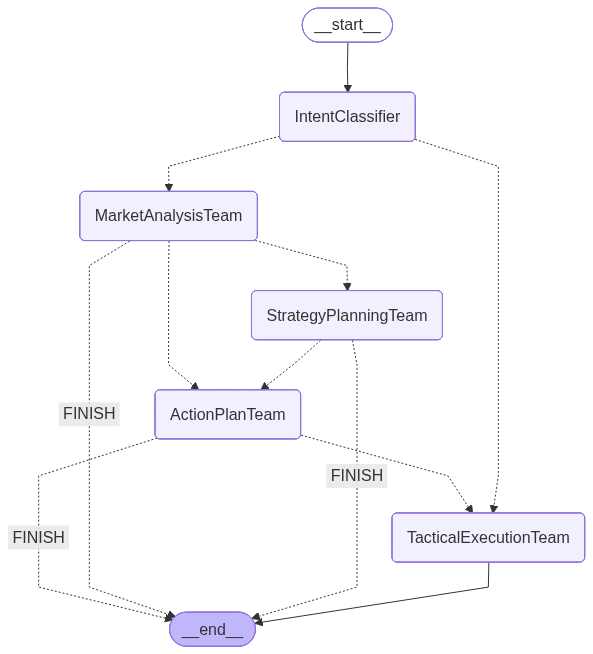

In [33]:
# 전체 Super-Graph 시각화
try:
    from IPython.display import Image, display
    display(Image(marketing_super_graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"그래프 시각화 오류: {e}")
    print("mermaid 또는 graphviz 설치가 필요할 수 있습니다.")

## 11. 테스트 실행

In [34]:
from langchain_core.runnables import RunnableConfig
import uuid

def run_marketing_graph(question: str, recursive_limit: int = 100):
    """마케팅 에이전트 팀을 실행합니다."""
    config = RunnableConfig(
        recursion_limit=recursive_limit,
        configurable={"thread_id": str(uuid.uuid4())}
    )
    
    inputs = {
        "messages": [HumanMessage(content=question)],
        "intent_tags": []
    }
    
    print("=" * 80)
    print("마케팅 전략 수립 에이전트 팀 실행")
    print("=" * 80)
    
    for step in marketing_super_graph.stream(inputs, config, stream_mode="values"):
        if "messages" in step and step["messages"]:
            last_message = step["messages"][-1]
            print(f"\n[{getattr(last_message, 'name', 'System')}]")
            print("-" * 80)
            print(last_message.content[:500] + "..." if len(last_message.content) > 500 else last_message.content)
    
    print("\n" + "=" * 80)
    print("작업 완료")
    print("=" * 80)
    
    return marketing_super_graph.get_state(config).values

### 테스트 케이스 1: 종합 전략 수립

In [35]:
# 테스트: 재방문률 향상 전략
result = run_marketing_graph(
    """카페 업종 가맹점입니다. 재방문률이 30% 이하로 낮은 상황입니다.
    매장에서 재방문률을 높일 수 있는 마케팅 아이디어와 근거를 제시해주세요."""
)

마케팅 전략 수립 에이전트 팀 실행

[None]
--------------------------------------------------------------------------------
카페 업종 가맹점입니다. 재방문률이 30% 이하로 낮은 상황입니다.
    매장에서 재방문률을 높일 수 있는 마케팅 아이디어와 근거를 제시해주세요.

[None]
--------------------------------------------------------------------------------
의도 분류 완료: 종합_전략_수립
이유: 사용자가 재방문율이 낮은 문제 상황을 제시하고, 이를 개선하기 위한 마케팅 아이디어와 근거를 요청하고 있습니다. 이는 문제 진단, 근본 원인 분석, 장기적 전략 수립이 필요한 포괄적인 질문이므로 [종합_전략_수립]으로 분류합니다.


/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  

KeyboardInterrupt: 

### 테스트 케이스 2: 콘텐츠 생성 가이드

In [ ]:
# 테스트: 인스타그램 홍보 방안
result = run_marketing_graph(
    "치킨 업종 가맹점입니다. 인스타그램 홍보 방안 가이드를 알려주세요."
)

### 테스트 케이스 3: 상황 전술 제안

In [ ]:
# 테스트: 날씨 기반 전술
result = run_marketing_graph(
    """카페 업종 가맹점입니다. 성수동에 위치하고 있습니다.
    비 오는 날의 마케팅 전략과 성수동 근처에서 최근 있는 행사에 어울리는 
    마케팅 전략을 고안해주세요."""
)

## 12. 결과 확인

In [ ]:
# 생성된 파일 목록 확인
import os

print("생성된 파일 목록:")
print("=" * 80)
for file in os.listdir(WORKING_DIRECTORY):
    file_path = WORKING_DIRECTORY / file
    if file_path.is_file():
        print(f"- {file} ({file_path.stat().st_size} bytes)")

In [ ]:
# 생성된 보고서 확인 (있는 경우)
report_files = [f for f in os.listdir(WORKING_DIRECTORY) if f.endswith('.md')]

if report_files:
    from IPython.display import Markdown, display
    
    for report_file in report_files:
        print(f"\n{'='*80}")
        print(f"파일: {report_file}")
        print(f"{'='*80}\n")
        
        with open(WORKING_DIRECTORY / report_file, 'r', encoding='utf-8') as f:
            display(Markdown(f.read()))